In [6]:
import warnings

import xarray as xr

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


## Read in data file

In [7]:
PlioMIP2_TS=xr.open_dataset('PlioMIP2_TS.nc')
PlioMIP2_TS

<xarray.Dataset>
Dimensions:  (model: 14, month: 12, lon: 360, lat: 181)
Coordinates:
  * model    (model) object 'ds_month_CESM_1_2_MODEL' ... 'ds_month_NorESM_L_...
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    Plio_TS  (model, month, lat, lon) float64 ...
    PI_TS    (model, month, lat, lon) float64 ...

In [8]:
#PlioMIP2_TS

## Create Weighted Means for Model and Control 

## CONTROL ZONAL MEAN 

## How to create weighted means using NUMPY Array for Control

In [9]:
PI_TS_ZM = np.mean(PlioMIP2_TS.PI_TS, axis=3)

lat=PlioMIP2_TS.lat
latr = np.deg2rad(lat)
weight = np.cos(latr)
PI_TS_GM=np.average(PI_TS_ZM, axis=2,weights=weight)

#Get Annual Mean 
PI_TS_GM_AM = np.mean(PI_TS_GM, axis=1)


## How to create weighted means using XAARAY Dataset for Control

In [10]:
weights = np.cos(np.deg2rad(PlioMIP2_TS['PI_TS'].lat))
weights.dims

('lat',)

In [11]:
control_weighted = PlioMIP2_TS['PI_TS'].weighted(weights)
control_weighted

DataArrayWeighted with weights along dimensions: lat

In [12]:
control=control_weighted.mean(dim=("lon", "lat"))

In [13]:
control=control.mean(axis=1)

In [15]:
#print(control)
print(control.values)

[287.28756893 287.46915883 287.26963177 286.44666813 287.18661097
 285.20356239 286.32346333 288.38829009 286.93325673 287.77062549
 286.76603893 287.18427239 286.94002033 285.62257488]


# MODEL ZONAL MEAN 

## How to create weighted means using NUMPY Array for Model

In [16]:
Plio_TS_ZM = np.mean(PlioMIP2_TS.Plio_TS, axis=3)

lat=PlioMIP2_TS.lat
latr = np.deg2rad(lat)
weight = np.cos(latr)
Plio_TS_GM=np.average(Plio_TS_ZM, axis=2,weights=weight)

#Get Annual Mean 
Plio_TS_GM_AM = np.mean(Plio_TS_GM, axis=1)

## How to create weighted means using XAARAY Dataset for Model

In [17]:
weights_m = np.cos(np.deg2rad(PlioMIP2_TS['Plio_TS'].lat))
weights_m.dims

('lat',)

In [18]:
model_weighted = PlioMIP2_TS['Plio_TS'].weighted(weights_m)
model_weighted

DataArrayWeighted with weights along dimensions: lat

In [19]:
model=model_weighted.mean(dim=("lon", "lat"))

In [20]:
model=model.mean(axis=1)

In [23]:
#model.values

array([291.32869245, 290.67260782, 289.93735468, 291.29733206,
       288.58957775, 287.54357032, 288.49536201, 293.62365856,
       290.72943358, 292.40208888, 289.79102012, 290.06775656,
       289.24909984, 287.7452853 ])

In [24]:
#print(Plio_TS_GM_AM)

# Remove extra letters from model values

In [22]:
print(model.model.values)
xticlab=[x[9:] for x in model.model.values]

['ds_month_CESM_1_2_MODEL' 'ds_month_COSMOS_MODEL' 'ds_month_CCSM4_MODEL'
 'ds_month_EC_EARTH_MODEL' 'ds_month_EC_EARTH_3_1_MODEL'
 'ds_month_IPSLCM6_LR_MODEL' 'ds_month_IPSLCM6_LR_2_1_MODEL'
 'ds_month_CESM2_MODEL' 'ds_month_UoFT_MODEL' 'ds_month_Utrecht_MODEL'
 'ds_month_MIROC4_MODEL' 'ds_month_LEEDS_MODEL'
 'ds_month_MRI_CGCM2_3_MODEL' 'ds_month_NorESM_L_MODEL']


In [25]:
#print(xticlab)

## Calculate the Global Mean Surface Temperature Anomolies

In [26]:
ds_anoms=model-control
#ds_anoms.model

In [27]:
#ds_anoms.shape

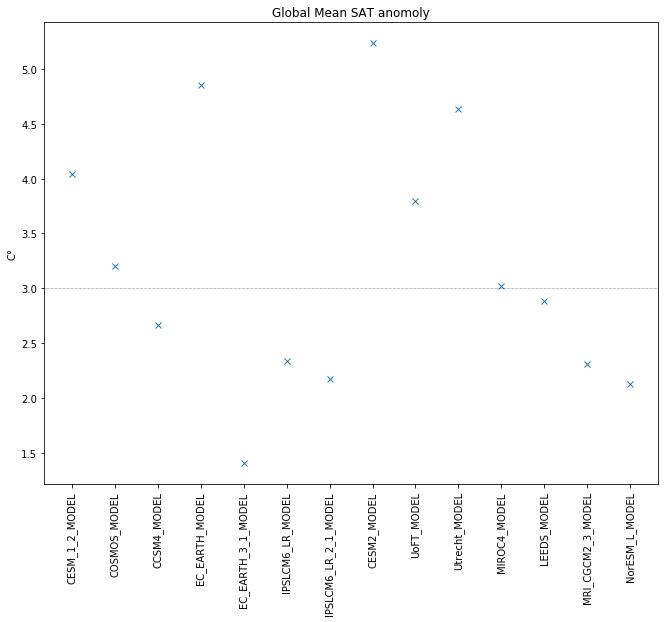

In [28]:
fig = plt.figure(figsize=(11,8.5))
plt.title("Global Mean SAT anomoly")
plt.plot(PlioMIP2_TS['model'],ds_anoms,'x',label='Plio_Model')
plt.xticks(rotation=90)
plt.ylabel("C\N{DEGREE SIGN}")
plt.xticks(PlioMIP2_TS['model'],xticlab,rotation=90);
plt.axhline(3,color='black',linewidth=0.5,linestyle='dotted')
#plt.savefig('Global_Mean_anoms.png')

# Defining Global Mean Surface Temperature High and Low Anoms Threshold

In [31]:
idx_high=PlioMIP2_TS.model.values[np.where(ds_anoms.values>=3)[0]]
idx_low=PlioMIP2_TS.model.values[np.where(ds_anoms.values<=3)[0]]

In [32]:
#print(idx_high)

In [33]:
high=PlioMIP2_TS.sel(model=idx_high)
high=high.mean(dim=("model", "month"))

low=PlioMIP2_TS.sel(model=idx_low)
low=low.mean(dim=("model", "month"))

In [34]:
print(high)
print(low)

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 181)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    Plio_TS  (lat, lon) float64 230.7 230.7 230.7 230.7 ... 264.6 264.6 264.6
    PI_TS    (lat, lon) float64 226.0 226.1 226.1 226.1 ... 252.6 252.6 252.6
<xarray.Dataset>
Dimensions:  (lon: 360, lat: 181)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    Plio_TS  (lat, lon) float64 229.9 229.9 229.9 229.9 ... 260.1 260.1 260.1
    PI_TS    (lat, lon) float64 227.4 227.4 227.4 227.4 ... 252.6 252.6 252.6


# Composite of Mean Surface Temperatures Anomalies for Global Mean > 3

Text(0.5, 1.0, 'Composite of Mean Surface Temperatures Anomalies for Global Mean > 3C°')

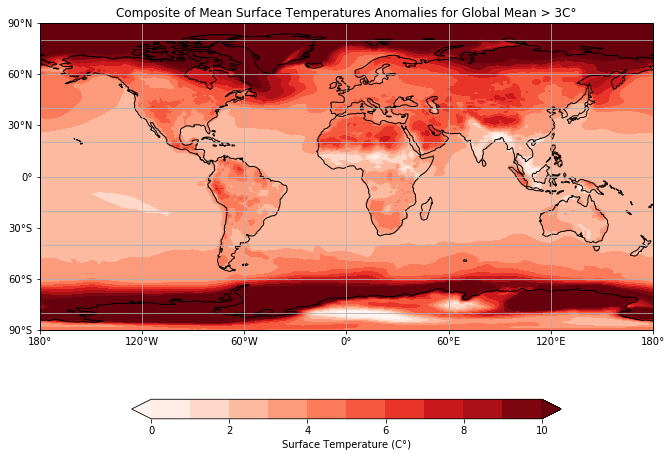

In [41]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

clevs=np.arange(0,11,1)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=high.Plio_TS-high.PI_TS
data, lons = add_cyclic_point(data, coord=high['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, high['lat'], data,clevs,
            transform = ccrs.PlateCarree(),cmap='Reds',extend='both')

ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Temperature (C\N{DEGREE SIGN})')

# Add title
plt.title('Composite of Mean Surface Temperatures Anomalies for Global Mean > 3C\N{DEGREE SIGN}')
#plt.savefig('CompGlobalmeananoms_high.png')

# Composite of Mean Surface Temperatures Anomalies for Global Mean < 3

Text(0.5, 1.0, 'Composite of Mean Surface Temperatures Anomalies for Global Mean > 3C°)')

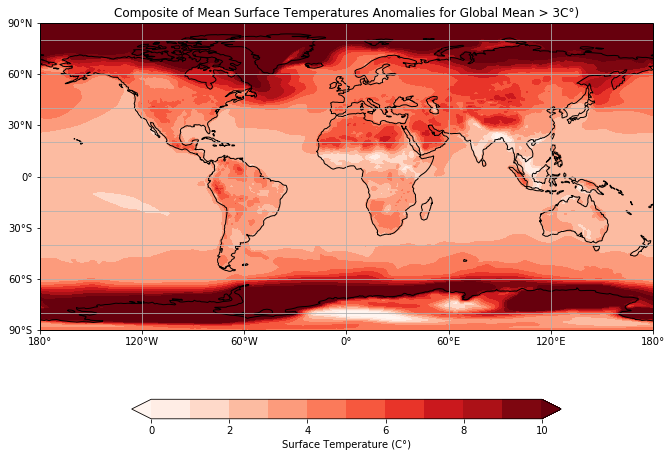

In [42]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

clevs=np.arange(0,11,1)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=high.Plio_TS-high.PI_TS
data, lons = add_cyclic_point(data, coord=high['lon'])


# Make a filled contour plot
cs=ax.contourf(lons, high['lat'], data,clevs,
            transform = ccrs.PlateCarree(),cmap='Reds',extend='both')

ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='Surface Temperature (C\N{DEGREE SIGN})')

# Add title
plt.title('Composite of Mean Surface Temperatures Anomalies for Global Mean > 3C\N{DEGREE SIGN})')
#plt.savefig('CompGlobalmeananoms_high.png')